<a href="https://colab.research.google.com/github/HoseinNekouei/MNIST_GAN_Architecture/blob/main/mnist_GAN_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras import models, layers

In [ ]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

x_train , x_test = x_train / 255.0 , x_test / 255.0

x_train.shape

In [ ]:
input_layer = layers.Input(shape =(28,28,1))

x = layers.Conv2D(32,(3,3), strides=(2,2))(input_layer)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Conv2D(64,(3,3,), strides=(2,2))(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Flatten()(x)
x = layers.Dense(80)(x)
x = layers.LeakyReLU(alpha=0.1)(x)
output_layer = layers.Dense(10,activation='softmax')(x)

net = models.Model(inputs = input_layer, outputs = output_layer)

net.compile(optimizer='adam',
            metrics=['accuracy'],
            loss=['sparse_categorical_crossentropy'])

H = net.fit(x_train, y_train,batch_size=32, epochs=20, validation_data=(x_test, y_test))

net.summary()

(10000, 28, 28)

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1708 - accuracy: 0.9491 - val_loss: 0.0678 - val_accuracy: 0.9781
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0588 - accuracy: 0.9821 - val_loss: 0.0546 - val_accuracy: 0.9817
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0402 - accuracy: 0.9870 - val_loss: 0.0448 - val_accuracy: 0.9851
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0288 - accuracy: 0.9903 - val_loss: 0.0462 - val_accuracy: 0.9868
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0224 - accuracy: 0.9927 - val_loss: 0.0482 - val_accuracy: 0.9851
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0192 - accuracy: 0.9938 - val_loss: 0.0470 - val_accuracy: 0.9846
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0129 - accuracy: 0.9958 - val_loss: 0.0567 - val_accuracy:

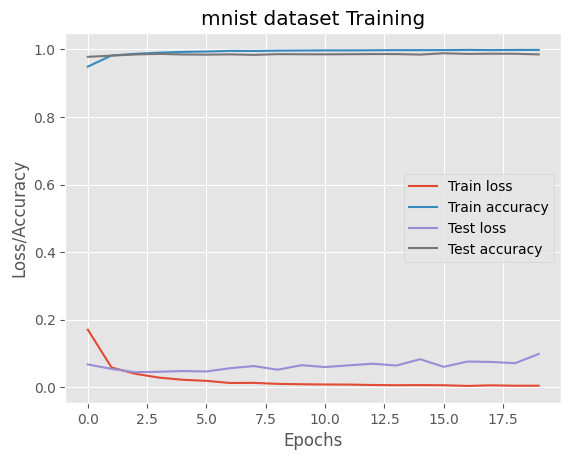

In [ ]:
plt.style.use('ggplot')

plt.plot(H.history['loss'], label='Train loss')
plt.plot(H.history['accuracy'], label='Train accuracy')
plt.plot(H.history['val_loss'], label='Test loss')
plt.plot(H.history['val_accuracy'], label='Test accuracy')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.title('mnist dataset Training')

plt.show()